IMPORTS

In [1]:
#imports
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import os 
import numpy as np

Class for importing ECG

In [2]:
#dataclass for importing in ecg data
## channels : imports in the label for each channels in the file
### sample-freq gives the frequency here it is 1000hz
#### data actually gives the ecg data at each millisecond
class TxtFile:
    def __init__(self, filepath, verbose=False):
        self.filepath = filepath
        self.channels, self.sample_freq, self.data = self.load_file()
        if verbose: print("Channels: {}".format(self.channels))

    def load_file(self):
        with open(self.filepath) as f:
            channels, sample_freq = self.load_channels(f)
            _ = self._read_until(f, "[Data]")
            data = f.read()
            data = pd.read_table(StringIO(data), names=channels, sep=',')
            # data = self.filter_data(data)
            return channels, sample_freq, data

    def load_channels(self, file):
        channels = []
        line = self._read_until(file, "Channels exported:")
        sample_freq = int(self._read_until(file, "Sample Rate").rsplit(' ', 1)[-1].rsplit('Hz')[0])
        n_channels = int(line.split(' ')[-1])
        for n_channel in range(n_channels):
            line = self._read_until(file, "Label:")
            channel_name = line.replace('Label: ', '').rstrip()
            channels.append(channel_name)
        return channels, sample_freq

    @staticmethod
    def _read_until(file, string):
        line = file.readline()
        while string not in line:
            line = file.readline()
        return line

In [3]:
#loading in the file to see if the file path is correct 
file_path = "/rds/general/project/fsn-ai-ecg-data/live/afml/CSCL_1st/CS/CSCL1_post_cs_1.txt"
txt_file = TxtFile(file_path, verbose=True)


Channels: ['I', 'aVF', 'V1', 'V6', 'CS 1-2', 'CS 3-4', 'CS 5-6', 'CS 7-8', 'CS 9-10']


In [4]:
txt_file.data

,I,aVF,V1,V6,CS 1-2,CS 3-4,CS 5-6,CS 7-8,CS 9-10
0,64,-176,-480,-320,-32,-144,144,80,-96
1,64,-160,-480,-272,-16,-48,224,112,-128
2,48,-128,-480,-256,48,-48,128,80,64
3,48,-96,-496,-224,-48,-112,176,32,64
4,32,-48,-496,-208,-32,-128,112,0,-64
...,...,...,...,...,...,...,...,...,...
59995,-464,-1216,-16,-1184,144,48,-48,0,-48
59996,-480,-1200,-16,-1184,112,-96,32,-128,0
59997,-496,-1200,32,-1168,80,16,-48,-80,-176
59998,-496,-1168,16,-1168,-112,0,80,-80,-144


In [5]:
np.load("/rds/general/user/oe222/home/AF_ecg/Preprocessing/CS_training.npy")

array([[ -128,  -144,  -128, ...,    32,    96,   128],
       [  352,   208,   -32, ...,  -112,   -48,   -16],
       [   32,    48,   128, ...,   -32,   -32,     0],
       ...,
       [  -32,   -64,   -16, ..., -4272, -4496, -4144],
       [-3072, -1616, -1024, ...,  -144,  -112,   -96],
       [  -64,   -64,   -16, ...,  -224,  -176,  -128]])

In [6]:
txt_file.sample_freq

1000

creating a df with file path , procdure and patient numbers in the cscl_1st directory

In [7]:
import os
import pandas as pd
import re
pd.reset_option("display.max_rows")
directory = "/rds/general/project/fsn-ai-ecg-data/live/afml/CSCL_1st/CS/"

file_paths = []  # List to store file paths
patient_numbers = []  # List to store patient numbers
procedures = []  # List to store procedures

# Regular expression pattern to extract the patient number and procedure
pattern = r"CSCL(\d+)_(pre|post)_"

for root, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

        # Extract patient number and procedure from the file name using regex
        match = re.search(pattern, file)
        if match:
            patient_number = match.group(1)
            procedure = match.group(2)
            patient_numbers.append(patient_number)
            procedures.append(procedure)
        else:
            patient_numbers.append(None)
            procedures.append(None)

# Create a DataFrame from the file_paths, patient_numbers, and procedures lists
df = pd.DataFrame({"File Path": file_paths, "Patient Number": patient_numbers, "Procedure": procedures})

print(df)




                                             File Path Patient Number  \
0    /rds/general/project/fsn-ai-ecg-data/live/afml...             48   
1    /rds/general/project/fsn-ai-ecg-data/live/afml...             60   
2    /rds/general/project/fsn-ai-ecg-data/live/afml...             15   
3    /rds/general/project/fsn-ai-ecg-data/live/afml...             81   
4    /rds/general/project/fsn-ai-ecg-data/live/afml...             49   
..                                                 ...            ...   
591  /rds/general/project/fsn-ai-ecg-data/live/afml...             29   
592  /rds/general/project/fsn-ai-ecg-data/live/afml...             41   
593  /rds/general/project/fsn-ai-ecg-data/live/afml...             71   
594  /rds/general/project/fsn-ai-ecg-data/live/afml...             72   
595  /rds/general/project/fsn-ai-ecg-data/live/afml...             73   

    Procedure  
0        post  
1         pre  
2         pre  
3         pre  
4        post  
..        ...  
591       p

Adding the patients in the cscl_redo directory

In [8]:
directory = "/rds/general/project/fsn-ai-ecg-data/live/afml/CSCL_redo/"
# Regular expression pattern to extract the patient number and procedure
pattern = r"CSCL(\d+)_(pre|post)_"

for root, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

        # Extract patient number and procedure from the file name using regex
        match = re.search(pattern, file)
        if match:
            patient_number = match.group(1)
            procedure = match.group(2)
            patient_numbers.append(patient_number)
            procedures.append(procedure)
        else:
            patient_numbers.append(None)
            procedures.append(None)

# Create a DataFrame from the file_paths, patient_numbers, and procedures lists
df = pd.DataFrame({"File Path": file_paths, "Patient Number": patient_numbers, "Procedure": procedures})

print(df)

                                             File Path Patient Number  \
0    /rds/general/project/fsn-ai-ecg-data/live/afml...             48   
1    /rds/general/project/fsn-ai-ecg-data/live/afml...             60   
2    /rds/general/project/fsn-ai-ecg-data/live/afml...             15   
3    /rds/general/project/fsn-ai-ecg-data/live/afml...             81   
4    /rds/general/project/fsn-ai-ecg-data/live/afml...             49   
..                                                 ...            ...   
711  /rds/general/project/fsn-ai-ecg-data/live/afml...            105   
712  /rds/general/project/fsn-ai-ecg-data/live/afml...            104   
713  /rds/general/project/fsn-ai-ecg-data/live/afml...            103   
714  /rds/general/project/fsn-ai-ecg-data/live/afml...             96   
715  /rds/general/project/fsn-ai-ecg-data/live/afml...             98   

    Procedure  
0        post  
1         pre  
2         pre  
3         pre  
4        post  
..        ...  
711       p

Adding patients from the RRAF direcotry 


In [9]:
import os
import pandas as pd
import re

directory = "/rds/general/project/fsn-ai-ecg-data/live/afml/RRAF/CS/"
pattern = r"RRAF(\d+)_(pre|post)_"

file_paths = []  # List to store file paths
patient_numbers = []  # List to store patient numbers
procedures = []  # List to store procedures

existing_patient_numbers = set(df["Patient Number"]) if "Patient Number" in df.columns else set()

for root, dirs, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

        # Extract patient number and procedure from the file name using regex
        match = re.search(pattern, file)
        if match:
            patient_number = int(match.group(1)) + 107
            while patient_number in existing_patient_numbers:
                patient_number += 107
            procedure = match.group(2)
            patient_numbers.append(int(patient_number))  # Convert to integer
            procedures.append(procedure)
        else:
            patient_numbers.append(None)
            procedures.append(None)

# Create a DataFrame from the file_paths, patient_numbers, and procedures lists
new_df = pd.DataFrame({"File Path": file_paths, "Patient Number": patient_numbers, "Procedure": procedures})

# Concatenate the new_df with the previous df
df = pd.concat([df, new_df], ignore_index=True)

print(df)

                                              File Path Patient Number  \
0     /rds/general/project/fsn-ai-ecg-data/live/afml...             48   
1     /rds/general/project/fsn-ai-ecg-data/live/afml...             60   
2     /rds/general/project/fsn-ai-ecg-data/live/afml...             15   
3     /rds/general/project/fsn-ai-ecg-data/live/afml...             81   
4     /rds/general/project/fsn-ai-ecg-data/live/afml...             49   
...                                                 ...            ...   
2411  /rds/general/project/fsn-ai-ecg-data/live/afml...          196.0   
2412  /rds/general/project/fsn-ai-ecg-data/live/afml...          181.0   
2413  /rds/general/project/fsn-ai-ecg-data/live/afml...          133.0   
2414  /rds/general/project/fsn-ai-ecg-data/live/afml...          208.0   
2415  /rds/general/project/fsn-ai-ecg-data/live/afml...          244.0   

     Procedure  
0         post  
1          pre  
2          pre  
3          pre  
4         post  
...      

In [10]:
#finding a removing rows with nas 
rows_with_nas = df[df.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nas)


Rows with NaN values:
                                              File Path Patient Number  \
1709  /rds/general/project/fsn-ai-ecg-data/live/afml...            NaN   

     Procedure  
1709      None  


In [11]:
#dropping na row 
df = df.drop(1709)


In [12]:
#saving csv
df.to_csv("output.csv", index=False)

In [13]:
#looking at the counts of patients and how many ecg samples have been taken 
pd.set_option("display.max_rows", None)
# Count unique patients and their frequencies
unique_patients = df["Patient Number"].nunique()
patient_frequencies = df["Patient Number"].value_counts()

print("Number of unique patients:", unique_patients)
print("\nnumber of ecg samples per patient:")
print(patient_frequencies)
pd.reset_option("display.max_rows")

Number of unique patients: 285

number of ecg samples per patient:
197.0    20
48       10
201.0    10
163.0    10
208.0    10
260.0    10
146.0    10
302.0    10
116.0    10
226.0    10
253.0    10
249.0    10
184.0    10
296.0    10
110.0    10
140.0    10
125.0    10
155.0    10
256.0    10
278.0    10
143.0    10
281.0    10
251.0    10
219.0    10
242.0    10
115.0    10
228.0    10
233.0    10
179.0    10
203.0    10
280.0    10
190.0    10
178.0    10
199.0    10
211.0    10
160.0    10
174.0    10
172.0    10
113.0    10
159.0    10
284.0    10
263.0    10
193.0    10
266.0    10
237.0    10
252.0    10
176.0    10
216.0    10
196.0    10
170.0    10
167.0    10
202.0    10
308.0    10
132.0    10
192.0    10
177.0    10
303.0    10
200.0    10
152.0    10
217.0    10
229.0    10
188.0    10
123.0    10
129.0    10
153.0    10
269.0    10
295.0    10
111.0    10
145.0    10
257.0    10
137.0    10
204.0    10
258.0    10
235.0    10
275.0    10
240.0    10
248.0    10
114.0    

Some pateints do not even have more than one ECG reeading now I wil check hwo many people do not have pre and post readings

In [14]:
pd.set_option("display.max_rows", None)
# Group the DataFrame by 'Patient Number' and 'Procedure' and count the occurrences
procedure_counts = df.groupby(['Patient Number', 'Procedure']).size().reset_index(name='Count')

print(procedure_counts)
pd.reset_option("display.max_rows")

    Patient Number Procedure  Count
0            108.0      post      5
1            108.0       pre      5
2            110.0      post      5
3            110.0       pre      5
4            111.0      post      5
5            111.0       pre      5
6            112.0      post      5
7            112.0       pre      5
8            113.0      post      5
9            113.0       pre      5
10           114.0      post      5
11           114.0       pre      5
12           115.0      post      5
13           115.0       pre      5
14           116.0      post      5
15           116.0       pre      5
16           117.0      post      5
17           117.0       pre      5
18           118.0      post      5
19           118.0       pre      5
20           119.0      post      5
21           119.0       pre      5
22           120.0      post      5
23           120.0       pre      5
24           121.0      post      5
25           121.0       pre      5
26           122.0      post

In [15]:
import os
import pandas as pd
import re

# Rest of your code...

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    filepath = row['File Path']
    txt_file = TxtFile(filepath)

    # Iterate through the channels in the TxtFile object
    for channel in txt_file.channels:
        # Create a column name based on the channel
        column_name = f"Channel_{channel}"
        
        # Add a new column to the DataFrame if it doesn't exist
        if column_name not in df.columns:
            df[column_name] = 0  # Initialize the column with zeros
        
        # Set the value to 1 if the channel is present in the TxtFile channels
        if channel in txt_file.channels:
            df.at[index, column_name] = 1

print(df) 

/var/tmp/pbs.7865767.pbs/ipykernel_1274107/908500116.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = 0  # Initialize the column with zeros
/var/tmp/pbs.7865767.pbs/ipykernel_1274107/908500116.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = 0  # Initialize the column with zeros
/var/tmp/pbs.7865767.pbs/ipykernel_1274107/908500116.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

                                              File Path Patient Number  \
0     /rds/general/project/fsn-ai-ecg-data/live/afml...             48   
1     /rds/general/project/fsn-ai-ecg-data/live/afml...             60   
2     /rds/general/project/fsn-ai-ecg-data/live/afml...             15   
3     /rds/general/project/fsn-ai-ecg-data/live/afml...             81   
4     /rds/general/project/fsn-ai-ecg-data/live/afml...             49   
...                                                 ...            ...   
2411  /rds/general/project/fsn-ai-ecg-data/live/afml...          196.0   
2412  /rds/general/project/fsn-ai-ecg-data/live/afml...          181.0   
2413  /rds/general/project/fsn-ai-ecg-data/live/afml...          133.0   
2414  /rds/general/project/fsn-ai-ecg-data/live/afml...          208.0   
2415  /rds/general/project/fsn-ai-ecg-data/live/afml...          244.0   

     Procedure  Channel_I  Channel_aVF  Channel_V1  Channel_V6  \
0         post          1            1       

In [18]:
#saving csv
df.to_csv("output.csv", index=False)


In [19]:
columns_no_zeros = df.loc[:, 'Channel_I':].columns[df.loc[:, 'Channel_I':].all()]
print("Columns with no zeros:")
print(columns_no_zeros)

Columns with no zeros:
Index([], dtype='object')


In [20]:
pd.set_option("display.max_rows", None)
#caclulating percentage of zero in channel collumns 
channel_columns = df.loc[:, 'Channel_I':]

zero_percentages = channel_columns.eq(0).mean() * 100
print("Percentage of zeros in each channel column:")
print(zero_percentages)
pd.reset_option("display.max_rows")


Percentage of zeros in each channel column:
Channel_I                1.656315
Channel_aVF              1.449275
Channel_V1               5.962733
Channel_V6               3.478261
Channel_CS 1-2          10.310559
Channel_CS 3-4           4.720497
Channel_CS 5-6           8.695652
Channel_CS 7-8           8.902692
Channel_CS 9-10          9.109731
Channel_CS 1,2          98.385093
Channel_CS 3,4          98.923395
Channel_CS 5,6          98.923395
Channel_CS 7,8          99.130435
Channel_CS 9,10         99.130435
Channel_II              88.902692
Channel_V2              92.380952
Channel_CS 3, 4         99.461698
Channel_CS 5 , 6        99.461698
Channel_CS 7 ,8         99.461698
Channel_CS 9, 10        99.461698
Channel_III             95.031056
Channel_aVR             96.480331
Channel_aVL             96.480331
Channel_V3              96.687371
Channel_V4              96.687371
Channel_V5              96.107660
Channel_Mapd            43.064182
Channel_Mapp            43.064182
Chan

Reading in the smaples per channel of each txt file to make sure we have 60,000 milliseconds of data for each txt file 

In [21]:
def read_samples_per_channel(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("Samples per channel"):
                samples_per_channel = line.split(":")[1].strip()
                return int(samples_per_channel)
    return None 

In [22]:
# Iterate through the DataFrame and add a new column "Sample Channels"
df['Sample Channels'] = df['File Path'].apply(read_samples_per_channel)

# Display the updated DataFrame
print(df)

                                              File Path Patient Number  \
0     /rds/general/project/fsn-ai-ecg-data/live/afml...             48   
1     /rds/general/project/fsn-ai-ecg-data/live/afml...             60   
2     /rds/general/project/fsn-ai-ecg-data/live/afml...             15   
3     /rds/general/project/fsn-ai-ecg-data/live/afml...             81   
4     /rds/general/project/fsn-ai-ecg-data/live/afml...             49   
...                                                 ...            ...   
2411  /rds/general/project/fsn-ai-ecg-data/live/afml...          196.0   
2412  /rds/general/project/fsn-ai-ecg-data/live/afml...          181.0   
2413  /rds/general/project/fsn-ai-ecg-data/live/afml...          133.0   
2414  /rds/general/project/fsn-ai-ecg-data/live/afml...          208.0   
2415  /rds/general/project/fsn-ai-ecg-data/live/afml...          244.0   

     Procedure  Channel_I  Channel_aVF  Channel_V1  Channel_V6  \
0         post          1            1       

/var/tmp/pbs.7865767.pbs/ipykernel_1274107/2024681533.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sample Channels'] = df['File Path'].apply(read_samples_per_channel)


In [23]:
# Check for rows with sample channels not equal to 60,000
invalid_rows = df[df['Sample Channels'] != 60000]

# Check if there are any invalid rows
if not invalid_rows.empty:
    print("Rows without 60,000 sample channels:")
    print(invalid_rows)
    num_invalid_rows = len(invalid_rows)
    print("Number of rows without 60,000 sample channels:", num_invalid_rows)
    
    # Remove the invalid rows from the DataFrame
    df = df.drop(invalid_rows.index)

    print("Invalid rows removed.")

# Print the updated DataFrame
print(df.shape)




Rows without 60,000 sample channels:
                                              File Path Patient Number  \
31    /rds/general/project/fsn-ai-ecg-data/live/afml...             83   
250   /rds/general/project/fsn-ai-ecg-data/live/afml...             26   
449   /rds/general/project/fsn-ai-ecg-data/live/afml...             12   
533   /rds/general/project/fsn-ai-ecg-data/live/afml...             61   
585   /rds/general/project/fsn-ai-ecg-data/live/afml...             48   
...                                                 ...            ...   
2335  /rds/general/project/fsn-ai-ecg-data/live/afml...          250.0   
2349  /rds/general/project/fsn-ai-ecg-data/live/afml...          298.0   
2350  /rds/general/project/fsn-ai-ecg-data/live/afml...          118.0   
2356  /rds/general/project/fsn-ai-ecg-data/live/afml...          228.0   
2380  /rds/general/project/fsn-ai-ecg-data/live/afml...          297.0   

     Procedure  Channel_I  Channel_aVF  Channel_V1  Channel_V6  \
31      

In [24]:
#saving the final df 
df.to_csv('output.csv', index=False)

In [25]:
pd.reset_option("display.max_rows")

In [3]:
import pandas as pd
from io import StringIO

class TxtFile:
    def __init__(self, filepath, verbose=False):
        self.filepath = filepath
        self.channels, self.sample_freq, self.data = self.load_file()
        if verbose: print("Channels: {}".format(self.channels))

    def load_file(self):
        with open(self.filepath) as f:
            channels, sample_freq = self.load_channels(f)
            _ = self._read_until(f, "[Data]")
            data = f.read()
            data = pd.read_table(StringIO(data), names=channels, sep=',')
            # data = self.filter_data(data)
            return channels, sample_freq, data

    def load_channels(self, file):
        channels = []
        line = self._read_until(file, "Channels exported:")
        sample_freq = int(self._read_until(file, "Sample Rate").rsplit(' ', 1)[-1].rsplit('Hz')[0])
        n_channels = int(line.split(' ')[-1])
        for n_channel in range(n_channels):
            line = self._read_until(file, "Label:")
            channel_name = line.replace('Label: ', '').rstrip()
            channels.append(channel_name)
        return channels, sample_freq

    @staticmethod
    def _read_until(file, string):
        line = file.readline()
        while string not in line:
            line = file.readline()
        return line

    def get_data_shape(self):
        return self.data.shape


csv with all 60,000 samples exactly widled down to 2347 samples 

In [27]:
df["DataShape"] = df["File Path"].apply(lambda x: TxtFile(x).get_data_shape())

In [28]:
df.to_csv('output.csv', index=False)

In [29]:
# Remove rows with data shape other than (60000, *)
df = df[df["DataShape"].apply(lambda shape: shape[0] == 60000)]
print(df.shape)

(2346, 119)


In [30]:
# Save the updated DataFrame to a CSV file
df.to_csv('output.csv', index=False)

In [31]:
#creating a final_df with 1 with each of these channels 

# Specify the channel columns
channel_columns = ['Channel_I', 'Channel_aVF', 'Channel_V1', 'Channel_V6', 'Channel_CS 3-4']

# Filter rows that have a value of 1 in all channel columns
rows_with_ones = df[(df[channel_columns] == 1).all(axis=1)]

# Create a new DataFrame with the specified channel columns and additional columns
additional_columns = ['File Path', 'Patient Number', 'Procedure']
final_df = rows_with_ones[channel_columns + additional_columns].copy()

# Print the new DataFrame
print("Number of rows with a value of 1 in all channel columns:", len(final_df))
print("New DataFrame with the specified channel columns and additional columns:")
print(final_df)



Number of rows with a value of 1 in all channel columns: 2070
New DataFrame with the specified channel columns and additional columns:
      Channel_I  Channel_aVF  Channel_V1  Channel_V6  Channel_CS 3-4  \
0             1            1           1           1               1   
1             1            1           1           1               1   
2             1            1           1           1               1   
3             1            1           1           1               1   
4             1            1           1           1               1   
...         ...          ...         ...         ...             ...   
2411          1            1           1           1               1   
2412          1            1           1           1               1   
2413          1            1           1           1               1   
2414          1            1           1           1               1   
2415          1            1           1           1               1   



In [32]:
#checking pateint sample counts
#looking at the counts of patients and how many ecg samples have been taken 
pd.set_option("display.max_rows", None)
# Count unique patients and their frequencies
unique_patients = final_df["Patient Number"].nunique()
patient_frequencies = final_df["Patient Number"].value_counts()

print("Number of unique patients:", unique_patients)
print("\nnumber of ecg samples per patient:")
print(patient_frequencies)
pd.reset_option("display.max_rows")

Number of unique patients: 259

number of ecg samples per patient:
125.0    10
204.0    10
288.0    10
122.0    10
183.0    10
294.0    10
131.0    10
158.0    10
253.0    10
249.0    10
184.0    10
185.0    10
168.0    10
187.0    10
236.0    10
181.0    10
110.0    10
264.0    10
135.0    10
140.0    10
157.0    10
265.0    10
201.0    10
42       10
238.0    10
152.0    10
243.0    10
256.0    10
111.0    10
145.0    10
143.0    10
138.0    10
191.0    10
120.0    10
193.0    10
200.0    10
303.0    10
217.0    10
192.0    10
132.0    10
308.0    10
167.0    10
170.0    10
141.0    10
252.0    10
199.0    10
237.0    10
266.0    10
263.0    10
283.0    10
284.0    10
159.0    10
211.0    10
280.0    10
129.0    10
286.0    10
166.0    10
206.0    10
285.0    10
208.0    10
223.0    10
156.0    10
304.0    10
257.0    10
224.0    10
258.0    10
262.0    10
1        10
70       10
126.0    10
188.0    10
51       10
7        10
241.0    10
151.0    10
33       10
20       10
155.0    

In [33]:
pd.reset_option("display.max_rows")

In [34]:
final_df.to_csv('final_df.csv')





# calulcating sample entropy at m =2 and r = 0.15 of sd for full df

In [3]:
#loading in preprocessed df fineal_df
df = pd.read_csv("final_df.csv")

In [4]:
df.shape

(2070, 9)

In [6]:
print(df)

      Unnamed: 0  Channel_I  Channel_aVF  Channel_V1  Channel_V6  \
0              0          1            1           1           1   
1              1          1            1           1           1   
2              2          1            1           1           1   
3              3          1            1           1           1   
4              4          1            1           1           1   
...          ...        ...          ...         ...         ...   
2065        2411          1            1           1           1   
2066        2412          1            1           1           1   
2067        2413          1            1           1           1   
2068        2414          1            1           1           1   
2069        2415          1            1           1           1   

      Channel_CS 3-4                                          File Path  \
0                  1  /rds/general/project/fsn-ai-ecg-data/live/afml...   
1                  1  /rds/genera

In [8]:
# this function will help extract the channels I need to caclulate the sample entropy for these df csv 
import numpy as np
import pandas as pd
from tqdm import tqdm  # Import tqdm for the progress bar

array_CS_3_4 = []

# Total number of file paths
total_files = len(df['File Path'])

# Use tqdm to create a progress bar
for i, filepath in enumerate(tqdm(df['File Path'], total=total_files)):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channel CS 3-4
    channel_CS_3_4 = 'CS 3-4'
    data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()
    array_CS_3_4.append(data_CS_3_4)
    

array_CS_3_4 = np.stack(array_CS_3_4, axis=0)
#getting array of df 
print("Shape of array_CS_3_4:", array_CS_3_4.shape)


100%|██████████| 2070/2070 [02:21<00:00, 14.61it/s]


Shape of array_CS_3_4: (2070, 60000)


In [10]:
##we need to reshape y which is cs here so that the sample are split byt 2000 timestamps
array_CS_3_4 = array_CS_3_4.reshape(62100,2000)
# we need to find sd for the r calculation 
print(np.std(array_CS_3_4)*0.15)

179.41626016294137


In [9]:
# function to calculate sample entropy 
import numpy as np
import pyeeg
from tqdm import tqdm

sample_entropies = []
with tqdm(total=len(array_CS_3_4)) as pbar:
    for X in array_CS_3_4:
        entropy = pyeeg.samp_entropy(X, 2, 179.41626016294137)
        sample_entropies.append(entropy)
        pbar.update(1)

y_val_en = np.array(sample_entropies)
y_val_en_shape = y_val_en.shape

print("Shape of y_val_en:", y_val_en_shape)

100%|██████████| 62100/62100 [3:20:12<00:00,  5.17it/s]

Shape of y_val_en: (62100,)


In [10]:
#now we want to duplicate by 30 and add the cross entropy calculation from a previous data set so we do not make any mistakes and I can use the old calculation
# Save the original length of the DataFrame before repeating rows
orig_len = len(df)

# Repeat each row 30 times
df = df.loc[np.repeat(df.index.values, 30)]
        
# Reset index
df = df.reset_index(drop=True)
df.shape

# Calculate the number of unique rows in the DataFrame
num_unique_rows = len(df) // 30

# Create time sequence (now starting at 2000 and ending at 60000 to have 30 points)
time_sequence = np.arange(2000, 60001, 2000)

# Repeat the time sequence for each unique row in the DataFrame
df['time'] = np.tile(time_sequence, num_unique_rows)

In [13]:
#adding the cross entrop values to the dataframe 
# Add the new column to the DataFrame
df['cross_entropy'] = y_val_en

In [14]:
#save df 
df.to_csv('df_cs_final.csv')

In [15]:
np.std(y_val_en)

0.16728604882999298

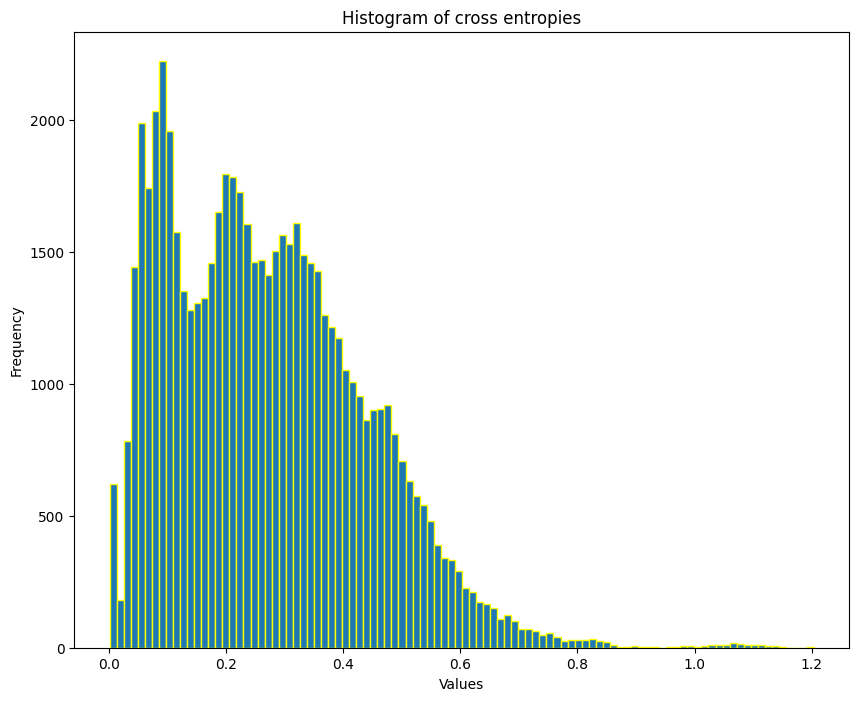

In [25]:
#plotting histogram of y_val_en
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
# Plot the histogram
plt.hist(y_val_en, bins=100, edgecolor='yellow')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of cross entropies')

# Show the plot
plt.show()


# Creating 5 fold splits 


In [49]:
#loading in csv with 62100 samples and cross entropy 
df_full = pd.read_csv('df_cs_final.csv')

In [50]:
import numpy as np
import random

def split_data(df, random_state, num_folds):
    # Find unique values in the 'Patient Number' column
    unique_values = df['Patient Number'].unique()

    # Shuffle the unique values with a random state
    random.Random(random_state).shuffle(unique_values)

    # Calculate the number of unique values in 1/folds
    chunk_size = int(np.ceil(len(unique_values) / num_folds))

    # Split the unique values into 1/folds
    chunks = [unique_values[i:i+chunk_size] for i in range(0, len(unique_values), chunk_size)]

    # Add a new column called 'Fold' and assign the corresponding chunk number to rows
    df['Fold'] = np.nan
    for i, chunk in enumerate(chunks):
        df.loc[df['Patient Number'].isin(chunk), 'Fold'] = i + 1

    # Calculate the number of rows and percentage in each fold
    fold_counts = df['Fold'].value_counts().sort_index()
    total_rows = len(df)
    fold_percentages = fold_counts / total_rows * 100

    return fold_counts, fold_percentages




In [51]:
df_full.shape

(62100, 12)

In [52]:
split_data(df_full,21,5)

(1.0    11430
 2.0    12210
 3.0    12540
 4.0    13140
 5.0    12780
 Name: Fold, dtype: int64,
 1.0    18.405797
 2.0    19.661836
 3.0    20.193237
 4.0    21.159420
 5.0    20.579710
 Name: Fold, dtype: float64)

In [53]:
df_full.to_csv('df_final_full.csv')

In [54]:
fold_1 = df_full[df_full['Fold'] == 1].copy()
fold_2 = df_full[df_full['Fold'] == 2].copy()
fold_3 = df_full[df_full['Fold'] == 3].copy()
fold_4 = df_full[df_full['Fold'] == 4].copy()
fold_5 = df_full[df_full['Fold'] == 5].copy()

In [55]:
#checking if patient numbers are truly unique 
print("Unique values in fold_1:")
print(fold_1['Patient Number'].unique())

print("Unique values in fold_2:")
print(fold_2['Patient Number'].unique())

print("Unique values in fold_3:")
print(fold_3['Patient Number'].unique())

print("Unique values in fold_4:")
print(fold_4['Patient Number'].unique())

print("Unique values in fold_5:")
print(fold_5['Patient Number'].unique())


Unique values in fold_1:
[ 15.  59.  47.  44.  11.  10.  70.  31.  28.   6.  37.  88.  66.  82.
  72.  35.  18.  42.  77.  38.  62.  55. 105.  95. 121. 194. 283. 285.
 129. 159. 280. 267. 253. 296. 113. 140. 125. 233. 123. 261. 165. 227.
 127. 168. 135. 145. 272. 270. 287. 126. 305. 300.]
Unique values in fold_2:
[ 60.  57.  78.  16.  51.  41.  52.   3.  50.  34.  17.   9.  63. 101.
 104. 106.  98. 122. 147. 207. 250. 286. 252. 196. 132. 199. 260. 146.
 249. 219. 115. 197. 203. 188. 298. 108. 247. 222. 157. 265. 290. 243.
 258. 275. 114. 153. 244. 241. 269. 213. 182. 231.]
Unique values in fold_3:
[ 49.   5.  74.  64.   7.  56.  68.  53.  19.  61.  27.  43.  14.  25.
   4.  40.  12.  97.  96. 103. 294. 183. 191. 120. 223. 234. 167. 303.
 152. 190. 171. 302. 116. 184. 110. 202. 143. 228. 155. 218. 158. 162.
 124. 181. 289. 274. 295. 111. 245. 297. 112. 151.]
Unique values in fold_4:
[ 36.  87.  46.  24.  33.   1.  75.  80.  73.  26.  85.  69.   2.  29.
  79.  54. 102. 119. 288. 239. 138

Number of rows in Fold 1: 11430
Number of rows in Fold 2: 12210
Number of rows in Fold 3: 12540
Number of rows in Fold 4: 13140
Number of rows in Fold 5: 12780


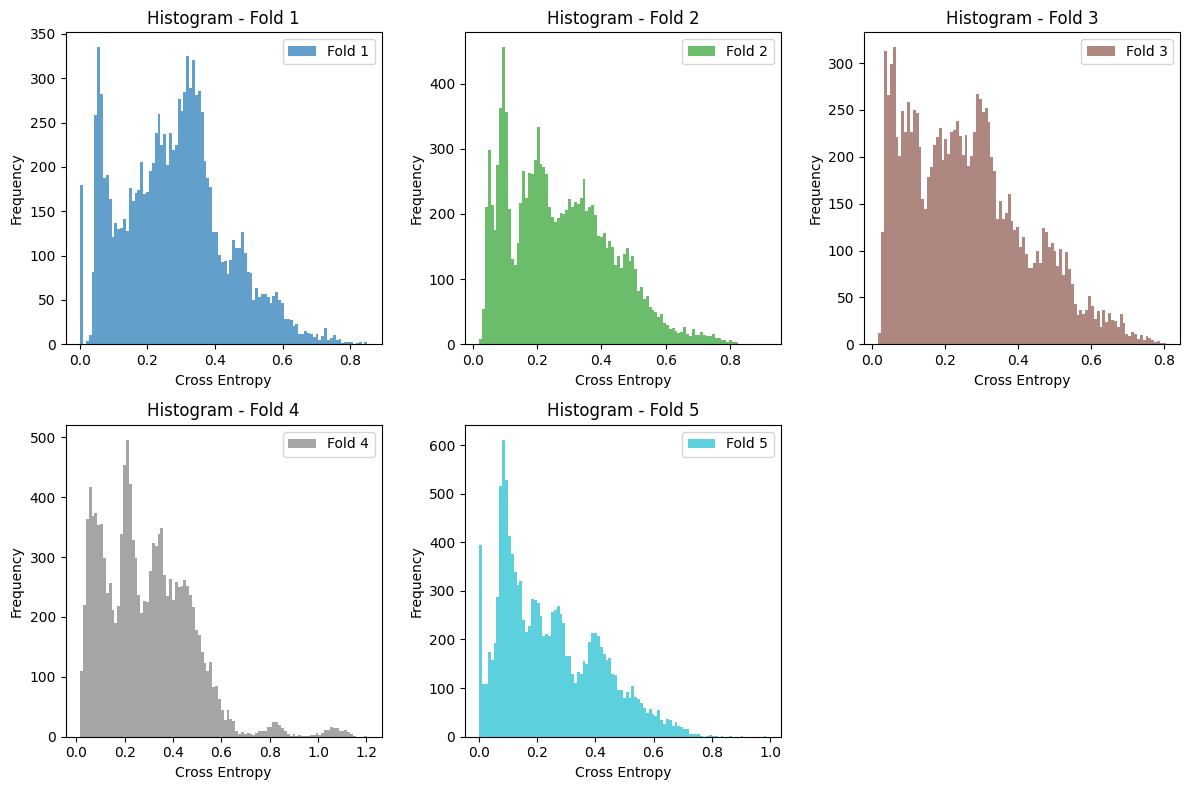

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have loaded your DataFrame df_full from your original CSV file

# Create separate histograms for each fold
plt.figure(figsize=(12, 8))

# Define a colormap with distinct colors for each fold
colors = plt.cm.tab10(np.linspace(0, 1, 5))

for fold in range(1, 6):
    fold_data = df_full[df_full['Fold'] == fold]
    num_rows = len(fold_data)

    plt.subplot(2, 3, fold)
    plt.hist(fold_data['cross_entropy'], bins=100, alpha=0.7, label=f'Fold {fold}', color=colors[fold - 1])
    plt.xlabel('Cross Entropy')
    plt.ylabel('Frequency')
    plt.title(f'Histogram - Fold {fold}')
    plt.legend()

    print(f"Number of rows in Fold {fold}: {num_rows}")

plt.tight_layout()
plt.show()




In [57]:
fold_1.to_csv('fold_1.csv', index=False)
fold_2.to_csv('fold_2.csv', index=False)
fold_3.to_csv('fold_3.csv', index=False)
fold_4.to_csv('fold_4.csv', index=False)
fold_5.to_csv('fold_5.csv', index=False)


# creating the data sets that rotate folds

In [58]:
#loading in folds for future use 
import pandas as pd
fold_1 = pd.read_csv('fold_1.csv')
fold_2 = pd.read_csv('fold_2.csv')
fold_3 = pd.read_csv('fold_3.csv')
fold_4 = pd.read_csv('fold_4.csv')
fold_5 = pd.read_csv('fold_5.csv')

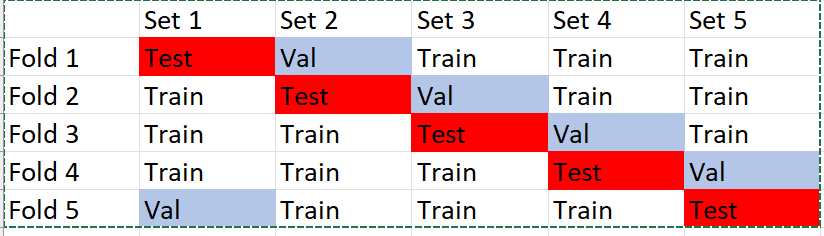

In [59]:
from IPython.display import display, Image

# Replace 'path/to/your/image.png' with the path to your image file
display(Image(filename="/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold splits.png"))


In [98]:
#Making a h5 file with meta data 
import h5py
import numpy as np
import pandas as pd

# Assuming you have the numpy array array_CS_3_4 and the DataFrame df_full already defined

# Save the data to an HDF5 file
with h5py.File('y_data.h5', 'w') as hf:
    # Save numerical data (array_CS_3_4)
    hf.create_dataset('numerical_data', data=array_CS_3_4)

    # Save metadata from the DataFrame (df_full)
    metadata = df_full[['Fold', 'cross_entropy', 'Patient Number', 'time']].to_records(index=False)
    hf.create_dataset('metadata', data=metadata)


In [99]:
#checking the meta data is correct 
import h5py

# Open the HDF5 file in read mode
with h5py.File('y_data.h5', 'r') as hf:
    # Access the numerical data
    array_CS_3_4 = hf['numerical_data'][:]
    
    # Access the metadata
    metadata_dataset = hf['metadata']
    
    # Convert the metadata to a DataFrame
    metadata_array = metadata_dataset[:]
    columns = metadata_dataset.dtype.names
    metadata_df = pd.DataFrame(metadata_array, columns=columns)

print(metadata_df)


       Fold  cross_entropy  Patient Number   time
0       5.0       0.105829            48.0   2000
1       5.0       0.114471            48.0   4000
2       5.0       0.127779            48.0   6000
3       5.0       0.130535            48.0   8000
4       5.0       0.104765            48.0  10000
...     ...            ...             ...    ...
62095   2.0       0.376656           244.0  52000
62096   2.0       0.346827           244.0  54000
62097   2.0       0.341210           244.0  56000
62098   2.0       0.369397           244.0  58000
62099   2.0       0.375576           244.0  60000

[62100 rows x 4 columns]


In [100]:
import h5py
import pandas as pd

# Open the HDF5 file in read mode
with h5py.File('y_data.h5', 'r') as hf:
    # Access the metadata
    metadata_dataset = hf['metadata']
    
    # Convert the metadata to a DataFrame
    metadata_array = metadata_dataset[:]
    columns = metadata_dataset.dtype.names
    metadata_df = pd.DataFrame(metadata_array, columns=columns)

# Filter the DataFrame to get rows where the 'Fold' column is 5.0
fold_5_data = metadata_df[metadata_df['Fold'] == 2.0]

# Access the numerical data for the filtered rows from the HDF5 file
fold_5_numerical_data = fold_5_data.index.to_numpy()

# Now, you can access the numerical data for rows where 'Fold' is 5.0
with h5py.File('y_data.h5', 'r') as hf:
    fold_5_numpy_array = hf['numerical_data'][fold_5_numerical_data]

print(fold_5_numpy_array.shape)


(12210, 2000)


In [105]:
import h5py
import numpy as np
import pandas as pd

def load_data_for_fold(fold_number, file_path):
    with h5py.File(file_path, 'r') as hf:
        # Access the metadata
        metadata_dataset = hf['metadata']
        
        # Convert the metadata to a DataFrame
        metadata_array = metadata_dataset[:]
        columns = metadata_dataset.dtype.names
        metadata_df = pd.DataFrame(metadata_array, columns=columns)

    # Calculate the fold numbers for y_train, y_val, and y_test
    num_folds = 5
    fold_val = (fold_number - 2) % num_folds + 1
    fold_test = fold_number
    
    # Indices for y_train (excluding fold_val and fold_test)
    train_folds = set(range(1, num_folds + 1)) - {fold_val, fold_test}
    train_data = metadata_df[metadata_df['Fold'].isin(train_folds)]
    train_indices = train_data.index.to_numpy()
    
    # Indices for y_val
    val_data = metadata_df[metadata_df['Fold'] == fold_val]
    val_indices = val_data.index.to_numpy()
    
    # Indices for y_test
    test_data = metadata_df[metadata_df['Fold'] == fold_test]
    test_indices = test_data.index.to_numpy()

    # Access the numerical data for y_train, y_val, and y_test from the HDF5 file
    with h5py.File(file_path, 'r') as hf:
        y_train = hf['numerical_data'][train_indices]
        y_val = hf['numerical_data'][val_indices]
        y_test = hf['numerical_data'][test_indices]
    
    return y_train, y_val, y_test

# Example usage:
fold_number = 1
file_path = 'X_data.h5'
X_train, X_val, X_test = load_data_for_fold(fold_number, file_path)




In [106]:
X_train.shape

(37890, 2000, 4)

# setting h5 files for X 

In [86]:
# we need to make a new array to find the 4 leads
import numpy as np
import pandas as pd
from tqdm import tqdm  # Import tqdm for the progress bar

# Create a list to store the arrays for each DataFrame
arrays_I_aVF_V1 = []

# Total number of file paths
total_files = len(df['File Path'])

# Use tqdm to create a progress bar
for i, filepath in enumerate(tqdm(df['File Path'], total=total_files)):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channels I, aVF, V1, V6
    channels_I_aVF_V1 = ['I','aVF', 'V1','V6']
    data_I_aVF_V1 = txt_file.data[channels_I_aVF_V1].to_numpy()
    
    # Check the shape of the data array for consistency
    if len(arrays_I_aVF_V1) > 0 and data_I_aVF_V1.shape != arrays_I_aVF_V1[0].shape:
        raise ValueError("Inconsistent shape for channels I, aVF, V1, V6. Please check the data.")
    
    arrays_I_aVF_V1.append(data_I_aVF_V1)
    

# Stack the arrays together using np.stack
array_I_aVF_V1 = np.stack(arrays_I_aVF_V1, axis=0)

# Print the shape of the final arrays
print("Shape of array_I_aVF_V1:", array_I_aVF_V1.shape)


100%|██████████| 2070/2070 [02:24<00:00, 14.34it/s]


Shape of array_I_aVF_V1: (2070, 60000, 4)


In [88]:
#reshaping array 
array_I_aVF_V1 = array_I_aVF_V1.reshape(62100,2000,4)

In [90]:
import h5py
import numpy as np
import pandas as pd

# Assuming you have the numpy array array_I_aVF_V1 and the DataFrame df_full already defined

# Save the data to an HDF5 file
with h5py.File('X_data.h5', 'w') as hf:
    # Save the 3D numerical data 
    hf.create_dataset('numerical_data', data=array_I_aVF_V1)

    # Save metadata from the DataFrame (df_full)
    metadata = df_full[['Fold', 'cross_entropy', 'Patient Number', 'time']].to_records(index=False)
    hf.create_dataset('metadata', data=metadata)


In [93]:
import h5py
import pandas as pd

# Open the HDF5 file in read mode
with h5py.File('X_data.h5', 'r') as hf:
    # Access the metadata
    metadata_dataset = hf['metadata']
    
    # Convert the metadata to a DataFrame
    metadata_array = metadata_dataset[:]
    columns = metadata_dataset.dtype.names
    metadata_df = pd.DataFrame(metadata_array, columns=columns)

# Filter the DataFrame to get rows where the 'Fold' column is 5.0
fold_5_data = metadata_df[metadata_df['Fold'] == 2.0]

# Access the numerical data for the filtered rows from the HDF5 file
fold_5_numerical_data = fold_5_data.index.to_numpy()

# Now, you can access the numerical data for rows where 'Fold' is 5.0
with h5py.File('X_data.h5', 'r') as hf:
    fold_5_numpy_array = hf['numerical_data'][fold_5_numerical_data]

print(fold_5_numpy_array.shape)

(12210, 2000, 4)


# Statifying the splits 

In [3]:
import numpy as np 
import pandas as pd
import pyeeg
from tqdm import tqdm
import matplotlib.pyplot as plt

In [18]:
# we need to create a data set that puts all the folds together again
df = pd.concat([fold_1, fold_2, fold_3, fold_4, fold_5], ignore_index=True)


In [19]:
#now we want to duplicate by 30 and add the cross entropy calculation from a previous data set so we do not make any mistakes and I can use the old calculation
# Save the original length of the DataFrame before repeating rows
orig_len = len(df)

# Repeat each row 30 times
df = df.loc[np.repeat(df.index.values, 30)]
        
# Reset index
df = df.reset_index(drop=True)
df.shape

# Calculate the number of unique rows in the DataFrame
num_unique_rows = len(df) // 30

# Create time sequence (now starting at 2000 and ending at 60000 to have 30 points)
time_sequence = np.arange(2000, 60001, 2000)

# Repeat the time sequence for each unique row in the DataFrame
df['time'] = np.tile(time_sequence, num_unique_rows)

In [21]:
#doing some qc on the df so need to save because jupyter notebook sucks and doesnt have a good view finder 
df.to_csv('df_full.csv', index=False)

In [28]:
# I need to calculate sample entropy for the 5th fold as I have not caclulated that 
##the code for creating the dataset is seen  in the creating folds that vals on fold 4 data set 
### Calulating the CS validation cross entropy for fold 5
#y_val
import numpy as np
import pyeeg
from tqdm import tqdm

sample_entropies = []
with tqdm(total=len(CS_test)) as pbar:
    for X in CS_test:
        entropy = pyeeg.samp_entropy(X, 2, 281)
        sample_entropies.append(entropy)
        pbar.update(1)

y_val_en_fold5 = np.array(sample_entropies)
y_val_en_shape = y_val_en_fold5.shape

print("Shape of y_val_en_fold5:", y_val_en_shape)


100%|██████████| 11970/11970 [36:29<00:00,  5.47it/s]

Shape of y_val_en_fold5: (11970,)


In [37]:
#now we need to combine the previously caclulated fold entropy with the new one 
import numpy as np

fold_123 = np.load("/rds/general/user/oe222/home/AF_ecg/Preprocessing/Fold_1/y_train_en_280.npy")
fold_4_en = np.load("/rds/general/user/oe222/home/AF_ecg/Preprocessing/Fold_1/y_val_en_280.npy")

# Combine the three arrays using np.concatenate
full_entropy = np.concatenate((fold_123, fold_4_en, y_val_en_fold5), axis=0)

# Verify the shape of the new array
print("Shape of full_entropy:", full_entropy.shape)


Shape of full_entropy: (62100,)


In [38]:
#now I add it to the csv as I have finally recovered the csv 
df['CS_entropy'] = full_entropy

# Verify the DataFrame with the new column
print(df)
#saving datafram
df.to_csv('df_full.csv', index=False)

       Channel_I  Channel_aVF  Channel_V1  Channel_V6  Channel_CS 3-4  \
0              1            1           1           1               1   
1              1            1           1           1               1   
2              1            1           1           1               1   
3              1            1           1           1               1   
4              1            1           1           1               1   
...          ...          ...         ...         ...             ...   
62095          1            1           1           1               1   
62096          1            1           1           1               1   
62097          1            1           1           1               1   
62098          1            1           1           1               1   
62099          1            1           1           1               1   

                                               File Path  Patient Number  \
0      /rds/general/project/fsn-ai-ecg-data/liv

Now that I have recovered the 5 folds as a full df we can now look at # stratifying the fold

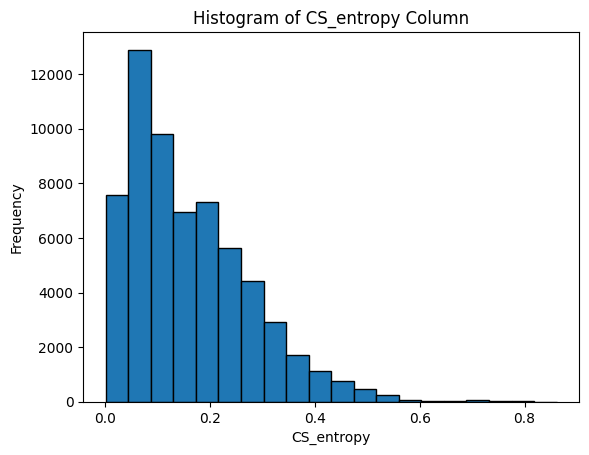

In [49]:
#plotting distibution 
plt.hist(df['CS_entropy'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('CS_entropy')
plt.ylabel('Frequency')
plt.title('Histogram of CS_entropy Column')
plt.show()


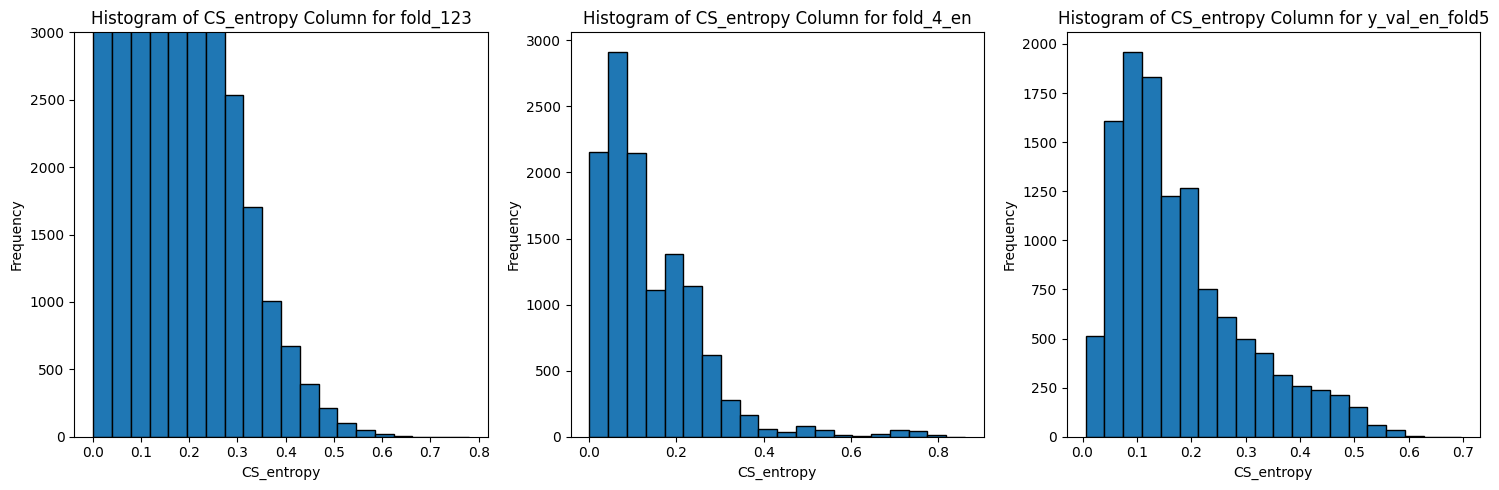

In [47]:
import matplotlib.pyplot as plt

# Assuming you have the arrays fold_123, fold_4_en, and y_val_en_fold5

# Create a 1x3 subplot grid
plt.figure(figsize=(15, 5))

# Plot histogram for fold_123
plt.subplot(131)  # 1 row, 3 columns, 1st subplot
plt.hist(fold_123, bins=20, edgecolor='black')
plt.xlabel('CS_entropy')
plt.ylabel('Frequency')
plt.title('Histogram of CS_entropy Column for fold_123')
plt.ylim(ymin=0, ymax=3000)

# Plot histogram for fold_4_en
plt.subplot(132)  # 1 row, 3 columns, 2nd subplot
plt.hist(fold_4_en, bins=20, edgecolor='black')
plt.xlabel('CS_entropy')
plt.ylabel('Frequency')
plt.title('Histogram of CS_entropy Column for fold_4_en')

# Plot histogram for y_val_en_fold5
plt.subplot(133)  # 1 row, 3 columns, 3rd subplot
plt.hist(y_val_en_fold5, bins=20, edgecolor='black')
plt.xlabel('CS_entropy')
plt.ylabel('Frequency')
plt.title('Histogram of CS_entropy Column for y_val_en_fold5')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


In [50]:
# function to stratify by fold 
import numpy as np
import random
import pandas as pd

def split_data(df, random_state, num_folds):
    # Find unique values in the 'Patient Number' column
    unique_values = df['Patient Number'].unique()

    # Shuffle the unique values with a random state
    random.Random(random_state).shuffle(unique_values)

    # Calculate the number of unique values in 1/folds
    chunk_size = int(np.ceil(len(unique_values) / num_folds))

    # Split the unique values into 1/folds
    chunks = [unique_values[i:i+chunk_size] for i in range(0, len(unique_values), chunk_size)]

    # Add a new column called 'Fold' and assign the corresponding chunk number to rows
    df['Fold'] = np.nan
    for i, chunk in enumerate(chunks):
        df.loc[df['Patient Number'].isin(chunk), 'Fold'] = i + 1

    # Calculate the number of rows and percentage in each fold
    fold_counts = df['Fold'].value_counts().sort_index()
    total_rows = len(df)
    fold_percentages = fold_counts / total_rows * 100

    # Stratify the folds by the distribution of the 'CS_entropy' column
    df['CS_entropy_bins'] = pd.qcut(df['CS_entropy'], num_folds, labels=False) + 1

    return fold_counts, fold_percentages


In [51]:
split_data(df,5,5)

(1.0    12540
 2.0    12390
 3.0    11790
 4.0    12510
 5.0    12870
 Name: Fold, dtype: int64,
 1.0    20.193237
 2.0    19.951691
 3.0    18.985507
 4.0    20.144928
 5.0    20.724638
 Name: Fold, dtype: float64)

In [52]:
print(df)

       Channel_I  Channel_aVF  Channel_V1  Channel_V6  Channel_CS 3-4  \
0              1            1           1           1               1   
1              1            1           1           1               1   
2              1            1           1           1               1   
3              1            1           1           1               1   
4              1            1           1           1               1   
...          ...          ...         ...         ...             ...   
62095          1            1           1           1               1   
62096          1            1           1           1               1   
62097          1            1           1           1               1   
62098          1            1           1           1               1   
62099          1            1           1           1               1   

                                               File Path  Patient Number  \
0      /rds/general/project/fsn-ai-ecg-data/liv

# |Creating the stratified samples|

In [8]:
# Replace 'your_file_path.csv' with the actual path to your CSV file
df = pd.read_csv('df_full.csv')

In [20]:
# Assuming you have the DataFrame df with the 'Patient Number' column

# Count the number of unique patients in the 'Patient Number' column
num_unique_patients = df['Patient Number'].nunique()

# Print the count of unique patients
print("Number of unique patients:", num_unique_patients)


Number of unique patients: 259


In [21]:
# Assuming you have the DataFrame df with the 'CS_entropy' column

# Filter the DataFrame to keep only rows where 'CS_entropy' is above 0.7
filtered_df = df[df['CS_entropy'] > 0.7]

# Create a list of unique patient numbers from the filtered DataFrame
unique_patients_above_0_7 = filtered_df['Patient Number'].unique().tolist()

# Count the number of samples for each unique patient
sample_count_by_patient = filtered_df['Patient Number'].value_counts()

# Print the list of unique patient numbers with 'CS_entropy' values above 0.7
# along with the number of samples each patient has
for patient_number in unique_patients_above_0_7:
    num_samples = sample_count_by_patient.get(patient_number, 0)
    print(f"Patient Number {patient_number}: {num_samples} samples")


Patient Number 211.0: 1 samples
Patient Number 185.0: 100 samples


In [22]:
# Assuming you have the DataFrame df with the 'Patient Number' column

# Replace 'SPECIFIC_NUMBER' with the specific patient number you want to filter for
specific_number = 185.0

# Filter the DataFrame to keep only rows where 'Patient Number' matches the specific number
specific_patient_rows = df[df['Patient Number'] == specific_number]

# Print the rows where 'Patient Number' matches the specific number
print(specific_patient_rows)


       Channel_I  Channel_aVF  Channel_V1  Channel_V6  Channel_CS 3-4  \
42420          1            1           1           1               1   
42421          1            1           1           1               1   
42422          1            1           1           1               1   
42423          1            1           1           1               1   
42424          1            1           1           1               1   
...          ...          ...         ...         ...             ...   
48595          1            1           1           1               1   
48596          1            1           1           1               1   
48597          1            1           1           1               1   
48598          1            1           1           1               1   
48599          1            1           1           1               1   

                                               File Path  Patient Number  \
42420  /rds/general/project/fsn-ai-ecg-data/liv

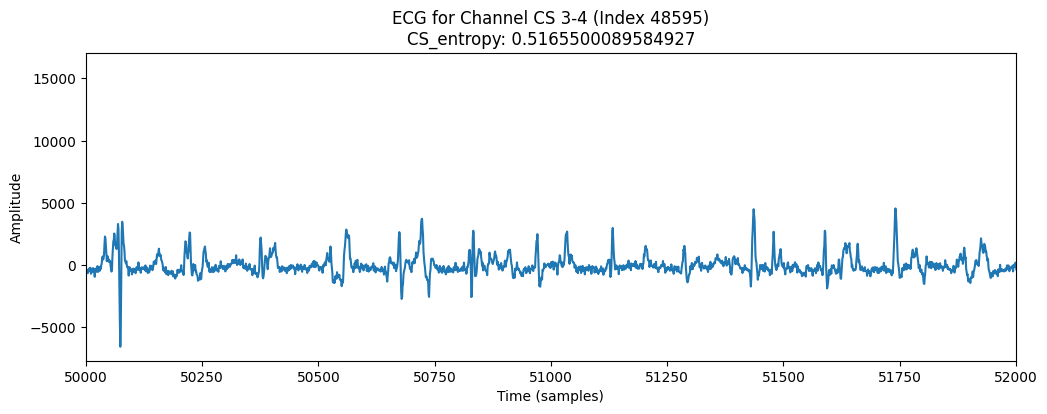

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame val_1 with the 'File Path' and 'CS_entropy' columns

# Replace 'SPECIFIC_INDEX' with the specific index in val_1 you want to plot the ECG for
specific_index = 48595

# Get the file path and CS_entropy for the specific index
filepath = df.loc[specific_index, 'File Path']
cs_entropy = df.loc[specific_index, 'CS_entropy']
xmax = df.loc[specific_index, 'time']

# Read the ECG data for channel 'CS 3-4' using TxtFile
txt_file = TxtFile(filepath)
channel_CS_3_4 = 'CS 3-4'
ecg_data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()

# Plot the ECG with CS_entropy value as title
plt.figure(figsize=(12, 4))
plt.plot(ecg_data_CS_3_4)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title(f'ECG for Channel CS 3-4 (Index {specific_index})\nCS_entropy: {cs_entropy}')
plt.xlim((xmax-2000),xmax)  # Replace X_MIN and X_MAX with your desired x-axis limits
plt.show()



In [5]:
#removing with samples with entropy above 0.7 
df = df[df['CS_entropy'] <= 0.7].reset_index(drop=True)

In [9]:
df.shape

(62100, 11)

In [10]:
import pandas as pd
import numpy as np

def split_data(df, random_state, num_folds=5):
    # Find unique values in the 'Patient Number' column
    unique_patients = df['Patient Number'].unique()

    # Shuffle the unique patient numbers with the provided random state
    unique_patients = np.random.RandomState(random_state).permutation(unique_patients)

    # Calculate the number of unique values in 1/num_folds
    chunk_size = int(np.ceil(len(unique_patients) / num_folds))

    # Split the unique values into num_folds
    folds = [unique_patients[i:i+chunk_size] for i in range(0, len(unique_patients), chunk_size)]

    # Initialize a dictionary to keep track of patient numbers assigned to each fold
    assigned_patients = {i: set() for i in range(num_folds)}

    # Add a new column called 'Fold_new' and assign the corresponding fold number to rows
    df['Fold_new'] = np.nan

    for i, fold in enumerate(folds):
        fold_assigned_patients = assigned_patients[i]

        for patient in fold:
            if patient not in fold_assigned_patients:
                # Select data points belonging to the current patient
                current_patient_data = df[df['Patient Number'] == patient]
                current_fold_data = df[df['Fold_new'] == i]

                # Perform stratified sampling based on 'CS_entropy' within the current fold
                current_patient_data['Fold_new'] = pd.cut(
                    current_patient_data['CS_entropy'],
                    bins=num_folds,
                    labels=False,
                    duplicates='drop'
                )
                df.update(current_patient_data)

                # Add the patient to the current fold and mark it as assigned
                df.loc[df['Patient Number'] == patient, 'Fold_new'] = i
                fold_assigned_patients.add(patient)

    # Calculate the number of rows and percentage in each fold
    fold_counts = df['Fold_new'].value_counts().sort_index()
    total_rows = len(df)
    fold_percentages = fold_counts / total_rows * 100

    return fold_counts, fold_percentages



In [12]:
df.shape

(62100, 12)

In [13]:
print(df)

       Channel_I  Channel_aVF  Channel_V1  Channel_V6  Channel_CS 3-4  \
0            1.0          1.0         1.0         1.0             1.0   
1            1.0          1.0         1.0         1.0             1.0   
2            1.0          1.0         1.0         1.0             1.0   
3            1.0          1.0         1.0         1.0             1.0   
4            1.0          1.0         1.0         1.0             1.0   
...          ...          ...         ...         ...             ...   
62095        1.0          1.0         1.0         1.0             1.0   
62096        1.0          1.0         1.0         1.0             1.0   
62097        1.0          1.0         1.0         1.0             1.0   
62098        1.0          1.0         1.0         1.0             1.0   
62099        1.0          1.0         1.0         1.0             1.0   

                                               File Path  Patient Number  \
0      /rds/general/project/fsn-ai-ecg-data/liv

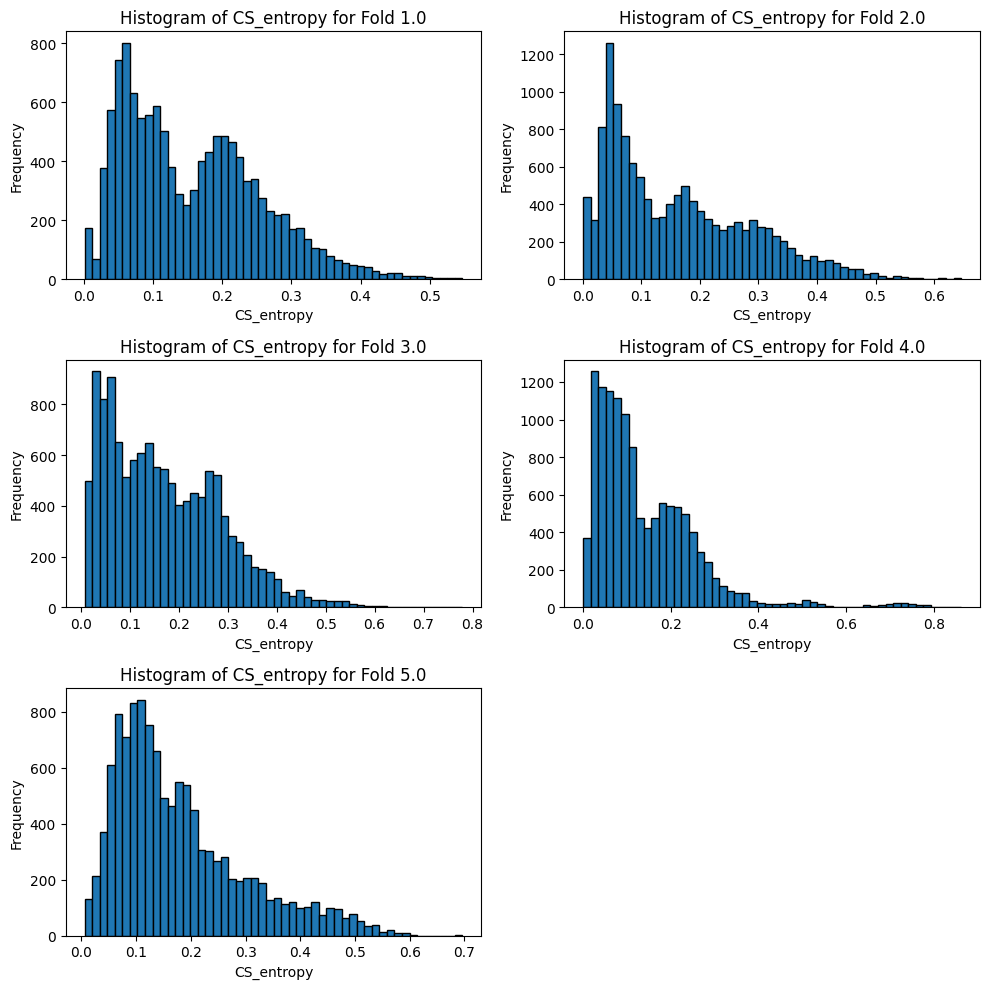

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame df with the 'CS_entropy' column and 'Fold' column after stratification

# Get the unique fold values
unique_folds = df['Fold'].unique()

# Calculate the number of rows and columns needed for subplots
num_rows = (len(unique_folds) + 1) // 2
num_cols = 2

# Create a subplot grid to plot histograms for each fold
plt.figure(figsize=(10, 10))

# Plot histograms for each fold
for i, fold in enumerate(unique_folds):
    plt.subplot(num_rows, num_cols, i + 1)
    fold_data = df[df['Fold'] == fold]['CS_entropy']
    plt.hist(fold_data, bins=50, edgecolor='black')
    plt.xlabel('CS_entropy')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of CS_entropy for Fold {fold}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()




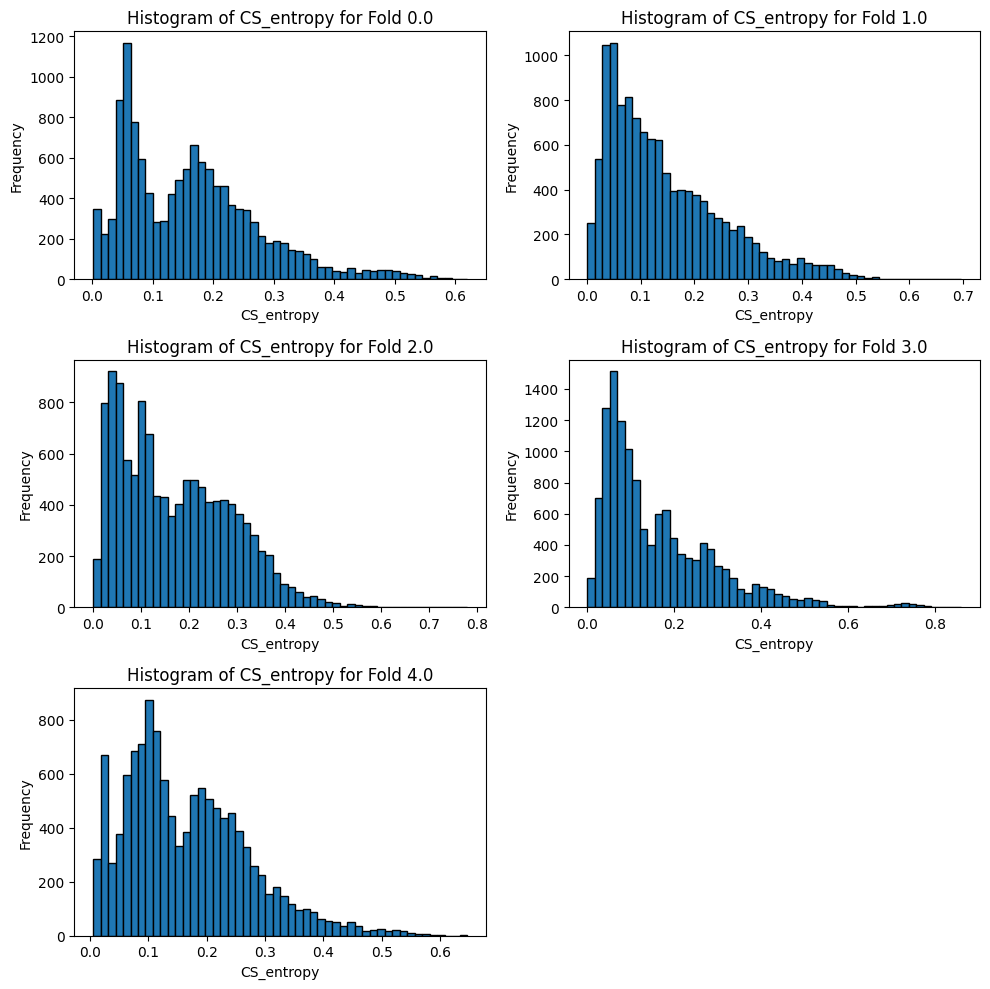

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame df with the 'CS_entropy' column and 'Fold_new' column after stratification

# Get the unique fold values and sort them in numerical order
unique_folds = sorted(df['Fold_new'].unique())

# Calculate the number of rows and columns needed for subplots
num_rows = (len(unique_folds) + 1) // 2
num_cols = 2

# Create a subplot grid to plot histograms for each fold
plt.figure(figsize=(10, 10))

# Plot histograms for each fold
for i, fold in enumerate(unique_folds):
    plt.subplot(num_rows, num_cols, i + 1)
    fold_data = df[df['Fold_new'] == fold]['CS_entropy']
    plt.hist(fold_data, bins=50, edgecolor='black')
    plt.xlabel('CS_entropy')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of CS_entropy for Fold {fold}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()



In [61]:
fold_1 = df[df['Fold_new'] == 0].copy()
fold_2 = df[df['Fold_new'] == 1].copy()
fold_3 = df[df['Fold_new'] == 2].copy()
fold_4 = df[df['Fold_new'] == 3].copy()
fold_5 = df[df['Fold_new'] == 4].copy()
#checking if patient numbers are truly unique 
print("Unique values in fold_1:")
print(fold_1['Patient Number'].unique())

print("Unique values in fold_2:")
print(fold_2['Patient Number'].unique())

print("Unique values in fold_3:")
print(fold_3['Patient Number'].unique())

print("Unique values in fold_4:")
print(fold_4['Patient Number'].unique())

print("Unique values in fold_5:")
print(fold_5['Patient Number'].unique())

Unique values in fold_1:
[ 23.  86.  42. 223. 199. 280. 110. 254.  24.  50.  18.  97. 266. 192.
 249. 256. 225. 224. 236. 222. 142. 112. 182.  75.  61.  88.  35.  77.
 196. 125. 135. 139.  57.  74.  26.  27.  66. 119. 183. 194. 233. 123.
 165. 126.   7.  55. 133. 148. 190. 164. 289. 259.]
Unique values in fold_2:
[ 59.  13.  43. 166. 263. 267. 209. 248. 297. 300.  37. 138. 304. 156.
 226. 143. 150. 276.  36.  87.  39.  64.  33.  54. 141. 170. 167. 113.
 108. 238. 275. 245.  12.  62. 100.  95.  98. 288. 159. 146. 171. 203.
 187.  60.  44.   4. 239. 252. 253. 201. 151. 213.]
Unique values in fold_3:
[ 11.  34.  72. 208. 251. 158. 290. 153. 241. 255.  20.  19.   3. 283.
 285. 234. 217. 197. 179. 218. 247. 204. 270. 240. 305.  69.  25. 104.
  96. 131. 207. 286. 129. 211. 152. 274. 111.  15.   9.  63.  38. 106.
 188. 157. 231.  81.  56. 232. 261. 272. 198. 244.]
Unique values in fold_4:
[ 16.  53.  32. 103. 147. 160. 237. 229. 296. 228. 227. 295. 277.  30.
  78.  76. 284. 140. 219. 265. 271

In [13]:
# Assuming you have the DataFrame df with the 'CS_entropy' column

# Filter the DataFrame to keep only rows where 'CS_entropy' is above 0.7
filtered_df = df[df['CS_entropy'] > 0.6]

# Create a list of unique patient numbers from the filtered DataFrame
unique_patients_above_0_7 = filtered_df['Patient Number'].unique().tolist()

# Count the number of samples for each unique patient
sample_count_by_patient = filtered_df['Patient Number'].value_counts()

# Print the list of unique patient numbers with 'CS_entropy' values above 0.7
# along with the number of samples each patient has
for patient_number in unique_patients_above_0_7:
    num_samples = sample_count_by_patient.get(patient_number, 0)
    print(f"Patient Number {patient_number}: {num_samples} samples")



Patient Number 222.0: 1 samples
Patient Number 305.0: 5 samples
Patient Number 51.0: 2 samples
Patient Number 205.0: 10 samples
Patient Number 185.0: 45 samples
Patient Number 7.0: 1 samples
Patient Number 201.0: 1 samples
Patient Number 127.0: 1 samples


In [19]:
fold_1

,Channel_I,Channel_aVF,Channel_V1,Channel_V6,Channel_CS 3-4,File Path,Patient Number,Procedure,Fold,time,CS_entropy,Fold_new
0,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,2000.0,0.299201,0.0
1,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,4000.0,0.255210,0.0
2,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,6000.0,0.283936,0.0
3,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,8000.0,0.258969,0.0
4,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,10000.0,0.278512,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62065,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,133.0,pre,5.0,52000.0,0.151582,0.0
62066,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,133.0,pre,5.0,54000.0,0.126814,0.0
62067,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,133.0,pre,5.0,56000.0,0.125880,0.0
62068,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,133.0,pre,5.0,58000.0,0.146044,0.0


In [17]:
#saving folds to csv 
fold_1.to_csv('fold_1_new.csv', index=False)
fold_2.to_csv('fold_2_new.csv', index=False)
fold_3.to_csv('fold_3_new.csv', index=False)
fold_4.to_csv('fold_4_new.csv', index=False)
fold_5.to_csv('fold_5_new.csv', index=False)

# sample weight approach to folds

In [31]:
targets = fold_1['CS_entropy']
freqs, bins = np.histogram(targets, bins='auto')
freqs = np.insert(freqs, 0, 1)  # Add freq of 1 at index 0 for samples in (-inf, bins[0])
freqs = np.append(freqs, 1)  # Add freq of 1 at index -1 for samples in (bins[-1], inf)
freqs[freqs == 0] = 1  # Replace freq of 0 with 1 to avoid division by 0
sample_weights = targets.apply(lambda x: 1 / freqs[np.digitize(x, bins)]).values

# Normalize sample weights
sample_weights *= len(sample_weights) / np.sum(sample_weights)

In [39]:
sample_weights.shape

(12630,)

In [32]:
import numpy as np


# Find the maximum value in the sample_weights array
max_value = np.max(sample_weights)

print("Maximum value of sample_weights:", max_value)


Maximum value of sample_weights: 271.61290322580646


In [33]:
import numpy as np

cs_entropy_data = fold_1['CS_entropy'].values
# Find the maximum value in the sample_weights array
max_value = np.max(cs_entropy_data)

print("Maximum value of sample_weights:", max_value)


Maximum value of sample_weights: 0.6197387077247836


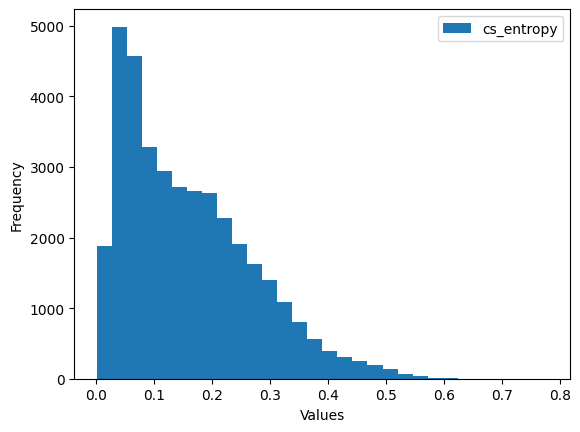

In [70]:
cs_entropy_data = train_1['CS_entropy'].values

# Create a histogram for the cs_entropy column
plt.hist(cs_entropy_data, bins=30,  label='cs_entropy')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()

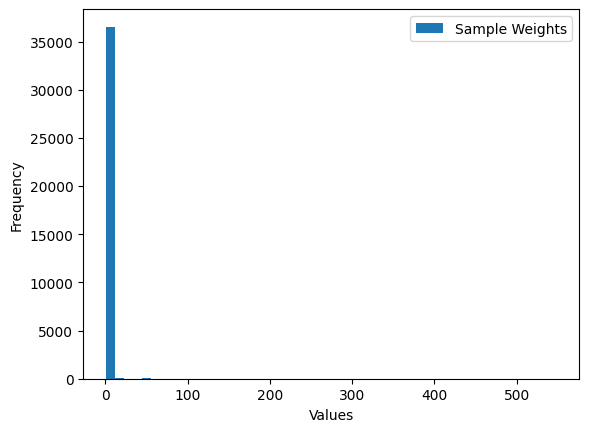

In [68]:
plt.hist(sample_weights, bins=50, label='Sample Weights')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
# Display the plot
plt.show()

In [62]:
fold_4.shape

(12930, 12)

# Creating fold the vals on fold 4 

In [69]:
#creating first data set 
train_1 = pd.concat([fold_1, fold_2, fold_3], ignore_index=True)
val_1 = fold_4
test_1 = fold_5

In [45]:
# calculating sample weights for train set only 
targets = train_1['CS_entropy']
freqs, bins = np.histogram(targets, bins='auto')
freqs = np.insert(freqs, 0, 1)  # Add freq of 1 at index 0 for samples in (-inf, bins[0])
freqs = np.append(freqs, 1)  # Add freq of 1 at index -1 for samples in (bins[-1], inf)
freqs[freqs == 0] = 1  # Replace freq of 0 with 1 to avoid division by 0
sample_weights = targets.apply(lambda x: 1 / freqs[np.digitize(x, bins)]).values

# Normalize sample weights
sample_weights *= len(sample_weights) / np.sum(sample_weights)
sample_weights.shape

(36750,)

In [47]:
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/y_train_SW.npy",sample_weights)

In [43]:
train_1.shape

(36750, 12)

In [46]:
val_1.shape

(12930, 12)

In [48]:
#saving the cross_entropies for the y_train
import numpy as np

# Extract the "CS_entropy" column as a NumPy array
cs_entropy_array = train_1['CS_entropy'].to_numpy()

print(cs_entropy_array.shape)

# Save the NumPy array to a .npy file
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/y_train_en.npy", cs_entropy_array)


(36750,)


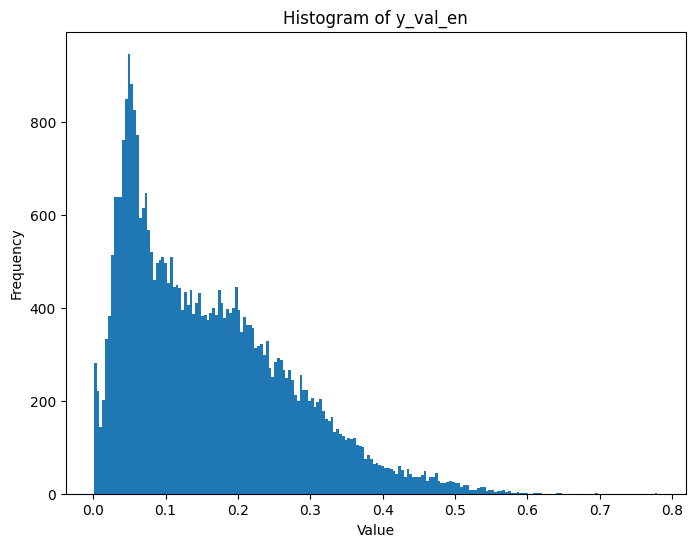

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(cs_entropy_array, bins=200)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_val_en')

# Show the plot
plt.show()


In [50]:
#devide my 30 to get original csv again or basically extracting the unique file names
train_1.drop_duplicates(subset='File Path', keep='first', inplace=True)
val_1.drop_duplicates(subset='File Path', keep='first', inplace=True)
test_1.drop_duplicates(subset='File Path', keep='first', inplace=True)

In [51]:
train_1.shape

(1225, 12)

In [52]:
train_1

,Channel_I,Channel_aVF,Channel_V1,Channel_V6,Channel_CS 3-4,File Path,Patient Number,Procedure,Fold,time,CS_entropy,Fold_new
0,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,2000.0,0.299201,0.0
30,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,post,1.0,2000.0,0.320506,0.0
60,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,23.0,pre,1.0,2000.0,0.401076,0.0
90,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,86.0,pre,1.0,2000.0,0.078683,0.0
120,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,86.0,pre,1.0,2000.0,0.068545,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36600,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,272.0,pre,5.0,2000.0,0.237130,2.0
36630,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,232.0,post,5.0,2000.0,0.063052,2.0
36660,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,198.0,pre,5.0,2000.0,0.059324,2.0
36690,1.0,1.0,1.0,1.0,1.0,/rds/general/project/fsn-ai-ecg-data/live/afml...,232.0,pre,5.0,2000.0,0.135428,2.0


In [53]:
import numpy as np
import pandas as pd
from tqdm import tqdm  # Import tqdm for the progress bar

# Create a list to store the arrays for each DataFrame
arrays_I_aVF_V1 = []
array_CS_3_4 = []

# Total number of file paths
total_files = len(train_1['File Path'])

# Use tqdm to create a progress bar
for i, filepath in enumerate(tqdm(train_1['File Path'], total=total_files)):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channels I, aVF, V1, V6
    channels_I_aVF_V1 = ['I','aVF', 'V1','V6']
    data_I_aVF_V1 = txt_file.data[channels_I_aVF_V1].to_numpy()
    
    # Check the shape of the data array for consistency
    if len(arrays_I_aVF_V1) > 0 and data_I_aVF_V1.shape != arrays_I_aVF_V1[0].shape:
        raise ValueError("Inconsistent shape for channels I, aVF, V1, V6. Please check the data.")
    
    arrays_I_aVF_V1.append(data_I_aVF_V1)
    
    # Extract the data for channel CS 3-4
    channel_CS_3_4 = 'CS 3-4'
    data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()
    array_CS_3_4.append(data_CS_3_4)
    

# Stack the arrays together using np.stack
array_I_aVF_V1 = np.stack(arrays_I_aVF_V1, axis=0)
array_CS_3_4 = np.stack(array_CS_3_4, axis=0)

# Print the shape of the final arrays
print("Shape of array_I_aVF_V1:", array_I_aVF_V1.shape)
print("Shape of array_CS_3_4:", array_CS_3_4.shape)





100%|██████████| 1225/1225 [01:27<00:00, 14.06it/s]


Shape of array_I_aVF_V1: (1225, 60000, 4)
Shape of array_CS_3_4: (1225, 60000)


In [54]:
#resahping training dataset
ECG_training = np.reshape(array_I_aVF_V1, (36750, 2000, 4))
CS_training = np.reshape(array_CS_3_4,(36750,2000))

In [55]:
import numpy as np
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/X_train.npy", ECG_training)


np.save('/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/y_train.npy', CS_training)

In [56]:
# Create a list to store the arrays for the validation
arrays_I_aVF_V1 = []
array_CS_3_4 = []

# Iterate through each file path in each DataFrame
for i, filepath in enumerate(val_1['File Path']):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channels I, aVF, V1, V6
    channels_I_aVF_V1 = ['I','aVF', 'V1','V6']
    data_I_aVF_V1 = txt_file.data[channels_I_aVF_V1].to_numpy()
    
    # Check the shape of the data array for consistency
    if len(arrays_I_aVF_V1) > 0 and data_I_aVF_V1.shape != arrays_I_aVF_V1[0].shape:
        raise ValueError("Inconsistent shape for channels I, aVF, V1, V6. Please check the data.")
    
    arrays_I_aVF_V1.append(data_I_aVF_V1)
    
    # Extract the data for channel CS 3-4
    channel_CS_3_4 = 'CS 3-4'
    data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()
    array_CS_3_4.append(data_CS_3_4)
    

# Stack the arrays together using np.stack
array_I_aVF_V1 = np.stack(arrays_I_aVF_V1, axis=0)
array_CS_3_4 = np.stack(array_CS_3_4, axis=0)

# Print the shape of the final arrays
print("Shape of array_I_aVF_V1:", array_I_aVF_V1.shape)
print("Shape of array_CS_3_4:", array_CS_3_4.shape)

Shape of array_I_aVF_V1: (431, 60000, 4)
Shape of array_CS_3_4: (431, 60000)


In [57]:
#making training dataset
ECG_validation = np.reshape(array_I_aVF_V1, (12930, 2000, 4))
CS_validation = np.reshape(array_CS_3_4,(12930,2000))

In [58]:
import numpy as np
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/X_val.npy", ECG_validation)


np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/y_val.npy", CS_validation)

In [63]:
import numpy as np

# Extract the "CS_entropy" column as a NumPy array
cs_entropy_array = fold_4['CS_entropy'].to_numpy()

print(cs_entropy_array.shape)

# Save the NumPy array to a .npy file
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/y_val_en.npy", cs_entropy_array)

(12930,)


In [64]:
import numpy as np
from tqdm import tqdm

arrays_I_aVF_V1 = []
array_CS_3_4 = []

# Iterate through each file path in each DataFrame with tqdm
for i, filepath in enumerate(tqdm(test_1['File Path'])):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channels I, aVF, V1, V6
    channels_I_aVF_V1 = ['I', 'aVF', 'V1', 'V6']
    data_I_aVF_V1 = txt_file.data[channels_I_aVF_V1].to_numpy()
    
    # Check the shape of the data array for consistency
    if len(arrays_I_aVF_V1) > 0 and data_I_aVF_V1.shape != arrays_I_aVF_V1[0].shape:
        raise ValueError("Inconsistent shape for channels I, aVF, V1, V6. Please check the data.")
    
    arrays_I_aVF_V1.append(data_I_aVF_V1)
    
    # Extract the data for channel CS 3-4
    channel_CS_3_4 = 'CS 3-4'
    data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()
    array_CS_3_4.append(data_CS_3_4)
    

# Stack the arrays together using np.stack
fold5_array_I_aVF_V1 = np.stack(arrays_I_aVF_V1, axis=0)
fold5_array_CS_3_4 = np.stack(array_CS_3_4, axis=0)

# Print the shape of the final arrays
print("Shape of array_I_aVF_V1:", fold5_array_I_aVF_V1.shape)
print("Shape of array_CS_3_4:", fold5_array_CS_3_4.shape)


100%|██████████| 414/414 [00:31<00:00, 13.22it/s]


Shape of array_I_aVF_V1: (414, 60000, 4)
Shape of array_CS_3_4: (414, 60000)


In [65]:
#making training dataset
ECG_test = np.reshape(fold5_array_I_aVF_V1, (12420, 2000, 4))
CS_test = np.reshape(fold5_array_CS_3_4,(12420,2000))

In [66]:
import numpy as np
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/X_test.npy", ECG_test)


np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/test.npy", CS_test)

In [67]:
import numpy as np

# Extract the "CS_entropy" column as a NumPy array
cs_entropy_array = fold_5['CS_entropy'].to_numpy()

print(cs_entropy_array.shape)

# Save the NumPy array to a .npy file
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/fold_4val/y_test_en.npy", cs_entropy_array)

(12420,)


import numpy as np
np.save('ECG_validation_2lead.npy', ECG_validation)

np.save('CS_validation_2lead.npy', CS_validation)

# creating validation for fold 1 

In [7]:
#creating first data set 
train_1 = pd.concat([fold_2, fold_3, fold_4], ignore_index=True)
val_1 = fold_1

In [10]:
#import ecg for train_1 
import numpy as np
import pandas as pd

# Create a list to store the arrays for each DataFrame
arrays_I_aVF_V1 = []
array_CS_3_4 = []

# Iterate through each file path in each DataFrame
for i, filepath in enumerate(train_1['File Path']):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channels I, aVF, V1, V6
    channels_I_aVF_V1 = ['I','aVF', 'V1','V6']
    data_I_aVF_V1 = txt_file.data[channels_I_aVF_V1].to_numpy()
    
    # Check the shape of the data array for consistency
    if len(arrays_I_aVF_V1) > 0 and data_I_aVF_V1.shape != arrays_I_aVF_V1[0].shape:
        raise ValueError("Inconsistent shape for channels I, aVF, V1, V6. Please check the data.")
    
    arrays_I_aVF_V1.append(data_I_aVF_V1)
    
    # Extract the data for channel CS 3-4
    channel_CS_3_4 = 'CS 3-4'
    data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()
    array_CS_3_4.append(data_CS_3_4)
    

# Stack the arrays together using np.stack
array_I_aVF_V1 = np.stack(arrays_I_aVF_V1, axis=0)
array_CS_3_4 = np.stack(array_CS_3_4, axis=0)

# Print the shape of the final arrays
print("Shape of array_I_aVF_V1:", array_I_aVF_V1.shape)
print("Shape of array_CS_3_4:", array_CS_3_4.shape)

Shape of array_I_aVF_V1: (1263, 60000, 4)
Shape of array_CS_3_4: (1263, 60000)


In [11]:
#making training dataset
ECG_training = np.reshape(array_I_aVF_V1, (37890, 2000, 4))
CS_training = np.reshape(array_CS_3_4,(37890,2000))

In [12]:
import numpy as np
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/Fold_2/X_train.npy", ECG_training)


np.save('/rds/general/user/oe222/home/AF_ecg/Preprocessing/Fold_2/y_train.npy', CS_training)

In [13]:
# Create a list to store the arrays for the validation
arrays_I_aVF_V1 = []
array_CS_3_4 = []

# Iterate through each file path in each DataFrame
for i, filepath in enumerate(val_1['File Path']):
    txt_file = TxtFile(filepath)
    
    # Extract the data for channels I, aVF, V1, V6
    channels_I_aVF_V1 = ['I','aVF', 'V1','V6']
    data_I_aVF_V1 = txt_file.data[channels_I_aVF_V1].to_numpy()
    
    # Check the shape of the data array for consistency
    if len(arrays_I_aVF_V1) > 0 and data_I_aVF_V1.shape != arrays_I_aVF_V1[0].shape:
        raise ValueError("Inconsistent shape for channels I, aVF, V1, V6. Please check the data.")
    
    arrays_I_aVF_V1.append(data_I_aVF_V1)
    
    # Extract the data for channel CS 3-4
    channel_CS_3_4 = 'CS 3-4'
    data_CS_3_4 = txt_file.data[channel_CS_3_4].to_numpy()
    array_CS_3_4.append(data_CS_3_4)
    

# Stack the arrays together using np.stack
array_I_aVF_V1 = np.stack(arrays_I_aVF_V1, axis=0)
array_CS_3_4 = np.stack(array_CS_3_4, axis=0)

# Print the shape of the final arrays
print("Shape of array_I_aVF_V1:", array_I_aVF_V1.shape)
print("Shape of array_CS_3_4:", array_CS_3_4.shape)

Shape of array_I_aVF_V1: (408, 60000, 4)
Shape of array_CS_3_4: (408, 60000)


In [14]:
#making training dataset
ECG_validation = np.reshape(array_I_aVF_V1, (12240, 2000, 4))
CS_validation = np.reshape(array_CS_3_4,(12240,2000))

In [15]:
import numpy as np
np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/Fold_2/X_val.npy", ECG_validation)


np.save("/rds/general/user/oe222/home/AF_ecg/Preprocessing/Fold_2/y_val.npy", CS_validation)